# 수정사항

동규님의 데이터로 학습.

In [1]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv('../Data/orb_data/train.csv', index_col=0)
test = pd.read_csv('../Data/orb_data/test.csv', index_col=0)
sample_submission = pd.read_csv('../Data/orb_data/sample_submission.csv', index_col=0)
mm_train = pd.read_csv('../Data/orb_data/train_x_0.2_99.8.csv', index_col=0)

In [2]:
# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

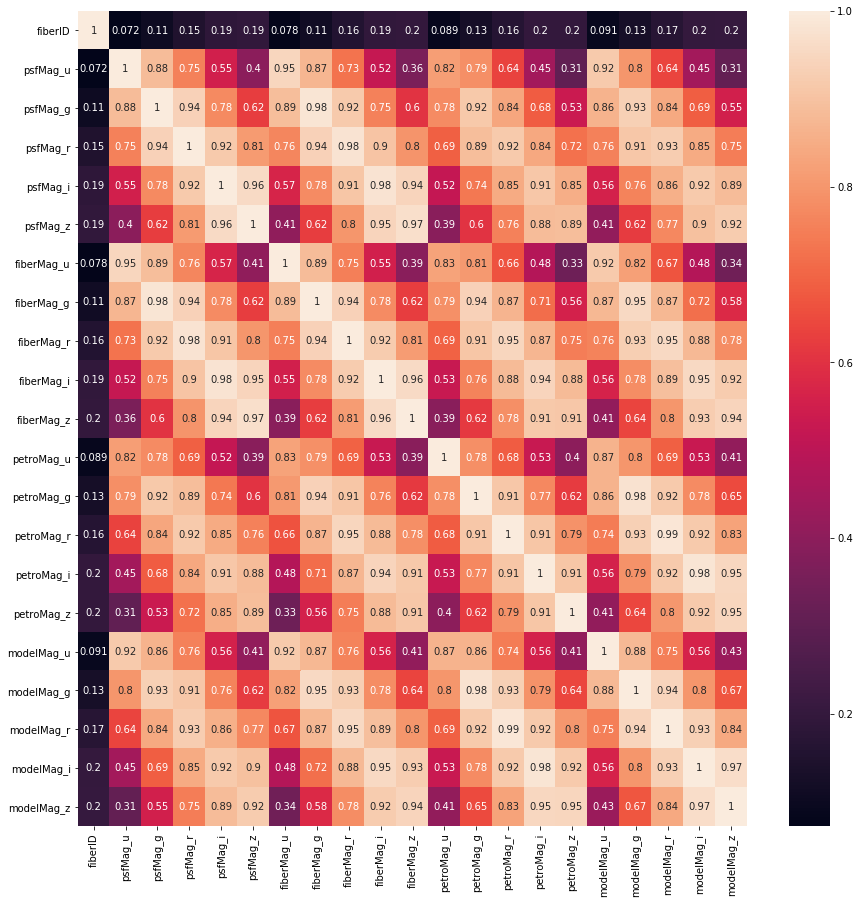

In [3]:
# 상관관계 파악을 위한 히트맵 그리기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(data=mm_train.corr(), annot=True)
plt.show()

In [4]:
# 모델에 적용할 데이터 셋 준비 
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test # (10009, 20)
train_x = mm_train

In [5]:
# FiberID 행 지우기
del train_x['fiberID']
del test_x['fiberID']

In [6]:
train_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,20.984007,19.860607,19.286211,18.870394,18.612132,21.171277,20.089070,19.503911,19.085584,18.827393,20.714714,19.600703,19.007003,18.601740,18.393617,20.731236,19.531210,18.939749,18.519284,18.276422
std,2.068628,1.853275,1.696300,1.613456,1.674223,1.956686,1.834191,1.698218,1.620603,1.671102,2.323579,2.028606,1.897642,1.839384,1.985542,2.176587,1.951686,1.852092,1.785942,1.855230
min,16.268373,15.219741,15.067677,14.915361,14.542514,16.591009,15.546216,15.413848,15.259058,14.868483,15.560760,14.865154,14.335362,14.036789,13.709452,16.164638,14.962227,14.450383,14.114361,13.800042
25%,19.652590,18.701180,18.048572,17.747663,17.425523,19.940403,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,20.871359,19.904235,19.454492,19.043895,18.611799,21.049096,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,22.160432,21.150297,20.515936,20.073528,19.883760,22.337540,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,26.938635,25.575422,24.059680,22.517061,23.315141,26.882039,25.706642,24.294442,22.870197,23.440828,31.627548,27.897671,26.002954,25.279656,26.706507,27.289858,25.622653,23.959345,22.408437,23.273177


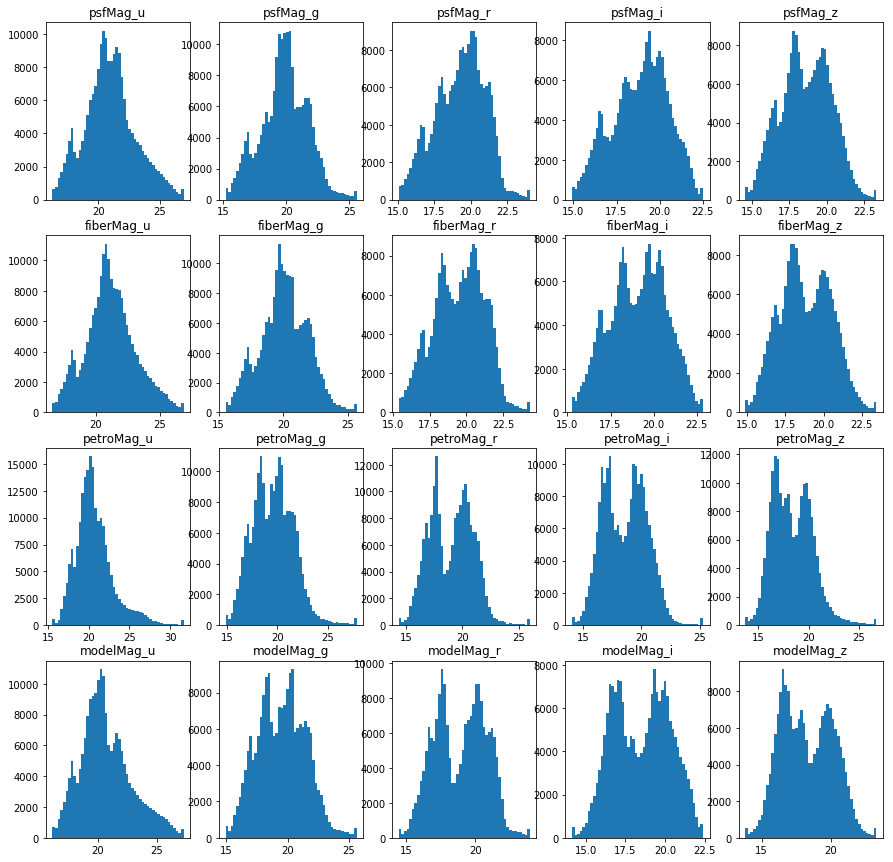

In [7]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(train_x.iloc[:,i], bins=50)
    plt.gca().set_title(train_x.columns[i])

In [8]:
test_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


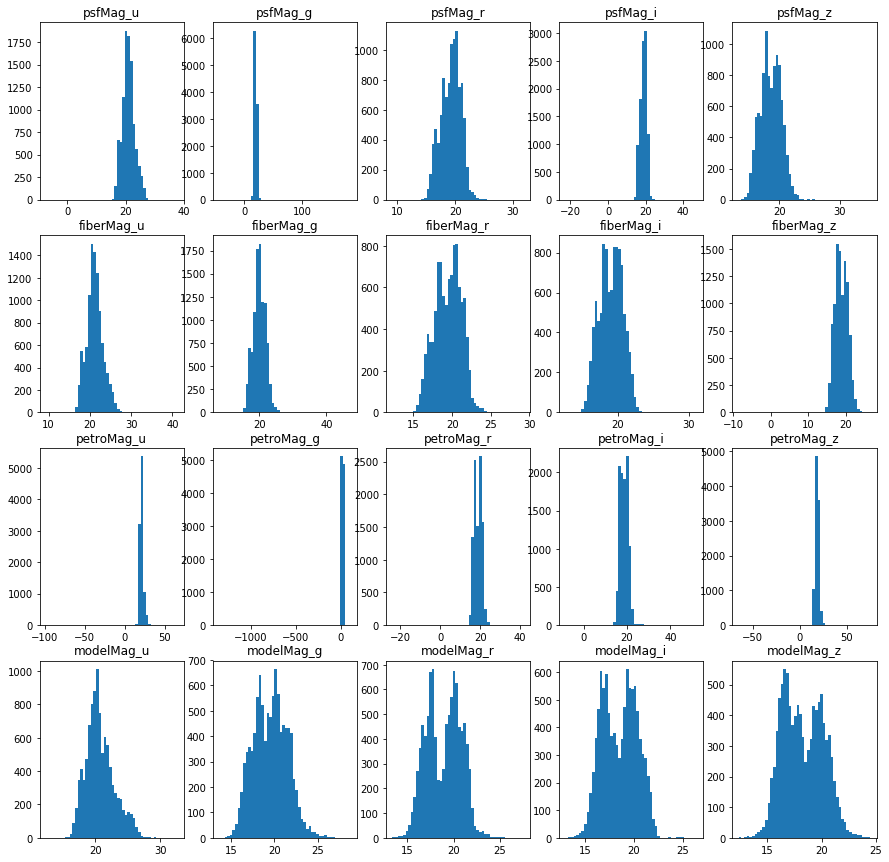

In [9]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(test_x.iloc[:,i], bins=50)
    plt.gca().set_title(test_x.columns[i])

In [10]:
!pip install tensorflow==1.14.0

pandas-profiling 2.4.0 requires confuse>=1.0.0, which is not installed.
pandas-profiling 2.4.0 requires htmlmin>=0.1.12, which is not installed.
pandas-profiling 2.4.0 requires missingno>=0.4.2, which is not installed.
amazonei-mxnet 1.5.1 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.18.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2,  shuffle=True, random_state=0)

# One-Hot Encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [12]:
# 데이터 스케일
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_x = scaler.transform(test_x)

In [13]:
# gelu activation function -  Gaussian Error Linear Units (GELUs)
# https://arxiv.org/abs/1606.08415

import numpy as np
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
class Gelu(Activation):
    def __init__(self, activation, **kwargs):
        super(Gelu, self).__init__(activation, **kwargs)
        self.__name__='gelu'
        
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

get_custom_objects().update({'gelu': Gelu(gelu)})

In [14]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

model = Sequential()
model.add(Dense(128, input_shape=(20,)))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.2))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.2))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))

In [15]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2688      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [16]:
# 조기 종료
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Adam optimizer default: keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [18]:
# 훈련
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, batch_size=256, callbacks=[early_stopping]) # epochs number changeable

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 127993 samples, validate on 31999 samples
Epoch 1/10000
127993/127993 [==============================] - 11s 89us/step - loss: 0.8657 - accuracy: 0.7377 - val_loss: 0.5493 - val_accuracy: 0.8243
Epoch 2/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.5755 - accuracy: 0.8117 - val_loss: 0.4886 - val_accuracy: 0.8342
Epoch 3/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.5324 - accuracy: 0.8222 - val_loss: 0.4657 - val_accuracy: 0.8408
Epoch 4/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.5098 - accuracy: 0.8289 - val_loss: 0.4696 - val_accuracy: 0.8394
Epoch 5/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.4949 - accuracy: 0.8330 - val_loss: 0.4436 - val_accuracy: 0.8465
Epoch 6/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.48

127993/127993 [==============================] - 11s 86us/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3775 - val_accuracy: 0.8662
Epoch 51/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.4040 - accuracy: 0.8593 - val_loss: 0.3751 - val_accuracy: 0.8678
Epoch 52/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.4042 - accuracy: 0.8588 - val_loss: 0.3772 - val_accuracy: 0.8657
Epoch 53/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.4043 - accuracy: 0.8584 - val_loss: 0.3813 - val_accuracy: 0.8647
Epoch 54/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.4012 - accuracy: 0.8596 - val_loss: 0.3800 - val_accuracy: 0.8659
Epoch 55/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.4047 - accuracy: 0.8594 - val_loss: 0.3734 - val_accuracy: 0.8691
Epoch 56/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.401

127993/127993 [==============================] - 11s 86us/step - loss: 0.3906 - accuracy: 0.8634 - val_loss: 0.3835 - val_accuracy: 0.8645
Epoch 104/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3914 - accuracy: 0.8635 - val_loss: 0.3717 - val_accuracy: 0.8683
Epoch 105/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3910 - accuracy: 0.8631 - val_loss: 0.3691 - val_accuracy: 0.8703
Epoch 106/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3901 - accuracy: 0.8638 - val_loss: 0.3711 - val_accuracy: 0.8681
Epoch 107/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3920 - accuracy: 0.8627 - val_loss: 0.3725 - val_accuracy: 0.8679
Epoch 108/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3905 - accuracy: 0.8635 - val_loss: 0.3717 - val_accuracy: 0.8678
Epoch 109/10000
127993/127993 [==============================] - 11s 86us/step - loss:

Epoch 156/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3842 - accuracy: 0.8649 - val_loss: 0.3670 - val_accuracy: 0.8709
Epoch 157/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3838 - accuracy: 0.8658 - val_loss: 0.3681 - val_accuracy: 0.8700
Epoch 158/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3859 - accuracy: 0.8646 - val_loss: 0.3653 - val_accuracy: 0.8696
Epoch 159/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3843 - accuracy: 0.8651 - val_loss: 0.3702 - val_accuracy: 0.8699
Epoch 160/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3862 - accuracy: 0.8640 - val_loss: 0.3733 - val_accuracy: 0.8694
Epoch 161/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3847 - accuracy: 0.8651 - val_loss: 0.3706 - val_accuracy: 0.8681
Epoch 162/10000
127993/127993 [==============================] - 11s 8

Epoch 209/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3808 - accuracy: 0.8660 - val_loss: 0.3699 - val_accuracy: 0.8707
Epoch 210/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3808 - accuracy: 0.8659 - val_loss: 0.3665 - val_accuracy: 0.8701
Epoch 211/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3815 - accuracy: 0.8661 - val_loss: 0.3709 - val_accuracy: 0.8691
Epoch 212/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3802 - accuracy: 0.8659 - val_loss: 0.3695 - val_accuracy: 0.8694
Epoch 213/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3803 - accuracy: 0.8666 - val_loss: 0.3715 - val_accuracy: 0.8700
Epoch 214/10000
127993/127993 [==============================] - 11s 86us/step - loss: 0.3801 - accuracy: 0.8670 - val_loss: 0.3702 - val_accuracy: 0.8697
Epoch 215/10000
127993/127993 [==============================] - 11s 8

Epoch 262/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3775 - accuracy: 0.8670 - val_loss: 0.3657 - val_accuracy: 0.8724
Epoch 263/10000
127993/127993 [==============================] - 11s 84us/step - loss: 0.3801 - accuracy: 0.8666 - val_loss: 0.3698 - val_accuracy: 0.8702
Epoch 264/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3782 - accuracy: 0.8674 - val_loss: 0.3724 - val_accuracy: 0.8695
Epoch 265/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3786 - accuracy: 0.8666 - val_loss: 0.3657 - val_accuracy: 0.8716
Epoch 266/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3773 - accuracy: 0.8673 - val_loss: 0.3671 - val_accuracy: 0.8709
Epoch 267/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3770 - accuracy: 0.8665 - val_loss: 0.3668 - val_accuracy: 0.8712
Epoch 268/10000
127993/127993 [==============================] - 11s 8

Epoch 315/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3756 - accuracy: 0.8678 - val_loss: 0.3708 - val_accuracy: 0.8707
Epoch 316/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3769 - accuracy: 0.8674 - val_loss: 0.3672 - val_accuracy: 0.8716
Epoch 317/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3778 - accuracy: 0.8672 - val_loss: 0.3676 - val_accuracy: 0.8704
Epoch 318/10000
127993/127993 [==============================] - 11s 84us/step - loss: 0.3746 - accuracy: 0.8678 - val_loss: 0.3657 - val_accuracy: 0.8706
Epoch 319/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3762 - accuracy: 0.8672 - val_loss: 0.3657 - val_accuracy: 0.8719
Epoch 320/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3755 - accuracy: 0.8680 - val_loss: 0.3653 - val_accuracy: 0.8720
Epoch 321/10000
127993/127993 [==============================] - 11s 8

Epoch 368/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3749 - accuracy: 0.8680 - val_loss: 0.3680 - val_accuracy: 0.8721
Epoch 369/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3743 - accuracy: 0.8678 - val_loss: 0.3682 - val_accuracy: 0.8711
Epoch 370/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3751 - accuracy: 0.8679 - val_loss: 0.3668 - val_accuracy: 0.8710
Epoch 371/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3738 - accuracy: 0.8679 - val_loss: 0.3677 - val_accuracy: 0.8711
Epoch 372/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3740 - accuracy: 0.8683 - val_loss: 0.3665 - val_accuracy: 0.8715
Epoch 373/10000
127993/127993 [==============================] - 11s 85us/step - loss: 0.3733 - accuracy: 0.8685 - val_loss: 0.3644 - val_accuracy: 0.8724
Epoch 374/10000
127993/127993 [==============================] - 11s 8

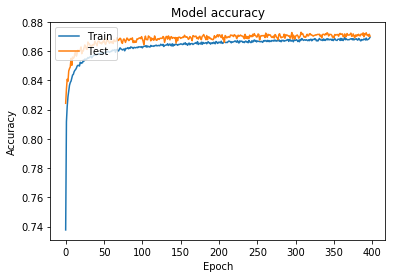

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

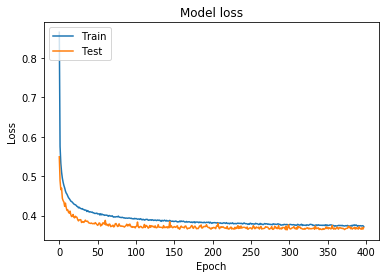

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# 평가예측
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)
print('loss: ', loss)
print('accuracy: ', accuracy)

39999/39999 [==============================] - 2s 55us/step
loss:  0.36794992781119956
accuracy:  0.8723968267440796


In [22]:
# Evaluating in optimal parameter
y_pred = model.predict(test_x)
print(y_pred)

[[4.2311711e-07 4.0881581e-08 1.5869353e-04 ... 7.8323480e-11
  1.5712361e-04 4.1092148e-06]
 [1.4395440e-04 5.3039639e-09 9.3733314e-09 ... 1.2931890e-10
  2.7420859e-07 2.8388330e-04]
 [1.5085444e-08 9.4661107e-15 2.8970746e-14 ... 1.3945887e-14
  2.6097448e-08 5.7989098e-09]
 ...
 [3.3561859e-04 1.1625966e-05 7.1241207e-10 ... 2.0816843e-07
  2.0468024e-06 6.5940462e-02]
 [4.3484105e-09 6.6087476e-11 3.1043419e-15 ... 5.3265174e-19
  5.1888788e-11 3.1565223e-04]
 [4.2144417e-05 5.8806475e-09 1.4815192e-12 ... 3.3701959e-09
  5.2992163e-11 1.1871725e-06]]


In [23]:
# 제출 파일 생성
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('./Submission/submission12-1.csv', index=True)

# 결과 분석 